In [1]:
# importing all the functions 
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string
import matplotlib.pyplot as plt

In [2]:
#stop_word  all are taken from the internet

stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [3]:
#X is a list where first element is name of document and second is the text in documents.
#Y is the category
X  =[] 
Y = []
for category in os.listdir("20_newsgroups"):
    for document in os.listdir("20_newsgroups/"+category):
        with open("20_newsgroups/"+category +'/'+document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

In [4]:
print(len("20_newsgroups"))
print(len("20_newsgroups/"+category))
print(len("20_newsgroups/"+category +'/'+document))

13
32
38


In [5]:
#DataType of X and Y in detail
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))
#Describing the text of document.
print(X[0])

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>
('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines:

In [6]:
#splitting training and testing data
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [7]:
#splitting 
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

14997
5000
14997
5000


In [8]:
#making dictionary of word with corrosponding frequencies
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)  #re.split function is used to split every word from the text...
    #Iterating over each word
    for s in stripped:
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic

{'path': 15301,
 'cantaloupe': 19553,
 'srv': 24229,
 'cmu': 39191,
 'edu': 122857,
 'das': 4568,
 'news': 25882,
 'harvard': 5206,
 'noc': 4650,
 'near': 5153,
 'net': 19202,
 'howland': 8271,
 'reston': 8235,
 'ans': 8336,
 'agate': 1343,
 'dog': 439,
 'lbl': 257,
 'gov': 3923,
 'network': 1429,
 'ucsd': 758,
 'rutgers': 5159,
 'igor': 793,
 'athos': 1411,
 'christian': 3764,
 'atterlep': 26,
 'vela': 184,
 'acs': 1462,
 'oakland': 266,
 'cardinal': 39,
 'ximenez': 15,
 'newsgroups': 15307,
 'soc': 4624,
 'religion': 3964,
 'subject': 16169,
 'atheists': 480,
 'hell': 809,
 'message': 16471,
 'apr': 15359,
 'date': 15559,
 'gmt': 13307,
 'sender': 8305,
 'hedrick': 731,
 'organization': 14854,
 'national': 1221,
 'association': 198,
 'disorganized': 14,
 'lines': 15697,
 'approved': 972,
 'aramis': 735,
 'hello': 319,
 'seen': 1314,
 'two': 3960,
 'common': 684,
 'threads': 58,
 'running': 1014,
 'postings': 241,
 'newsgroup': 464,
 'think': 6115,
 'can': 14937,
 'used': 3182,
 'expl

In [9]:
# Sorting the dictionary on basis of frequency of words 
# descending order
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 122857),
 ('cmu', 39191),
 ('com', 37576),
 ('news', 25882),
 ('not', 25069),
 ('srv', 24229),
 ('cantaloupe', 19553),
 ('net', 19202),
 ('message', 16471),
 ('subject', 16169),
 ('lines', 15697),
 ('date', 15559),
 ('apr', 15359),
 ('newsgroups', 15307),
 ('path', 15301),
 ('can', 14937),
 ('organization', 14854),
 ('state', 14130),
 ('gmt', 13307),
 ('ohio', 11922),
 ('one', 11834),
 ('will', 11541),
 ('writes', 11015),
 ('article', 10075),
 ('comp', 9809),
 ('references', 9777),
 ('talk', 9271),
 ('misc', 9011),
 ('ans', 8336),
 ('sender', 8305),
 ('howland', 8271),
 ('reston', 8235),
 ('don', 7888),
 ('like', 7839),
 ('people', 7733),
 ('university', 7466),
 ('just', 7429),
 ('posting', 7394),
 ('nntp', 7041),
 ('mps', 6883),
 ('know', 6794),
 ('host', 6728),
 ('sci', 6494),
 ('get', 6410),
 ('usenet', 6224),
 ('zaphod', 6211),
 ('may', 6149),
 ('think', 6115),
 ('alt', 6094),
 ('politics', 6017),
 ('windows', 5868),
 ('also', 5691),
 ('time', 5315),
 ('use', 5223),
 ('har

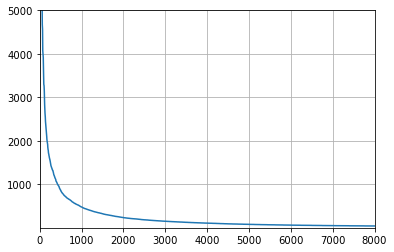

In [10]:
#plotting graph(words vs freq)
#further deciding number of features we want to take
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()

In [11]:
#taking top 2000 word with maximum frequencies in 1 variable
answer1=[features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'can',
 'organization',
 'state',
 'gmt',
 'ohio',
 'one',
 'will',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'ans',
 'sender',
 'howland',
 'reston',
 'don',
 'like',
 'people',
 'university',
 'just',
 'posting',
 'nntp',
 'mps',
 'know',
 'host',
 'sci',
 'get',
 'usenet',
 'zaphod',
 'may',
 'think',
 'alt',
 'politics',
 'windows',
 'also',
 'time',
 'use',
 'harvard',
 'rutgers',
 'near',
 'new',
 'eng',
 'rec',
 'good',
 'system',
 'well',
 'noc',
 'sei',
 'soc',
 'crabapple',
 'das',
 'xref',
 'now',
 'cis',
 'even',
 'see',
 'god',
 'europa',
 'gtefsd',
 'uunet',
 'world',
 'ece',
 'way',
 'org',
 'religion',
 'two',
 'max',
 'gov',
 'many',
 'first',
 'much',
 'say',
 'make',
 'christian',
 'right',
 'rochester',
 'distribution',
 'club',
 'want',
 'mail',
 'gatech',
 'ibm',
 'space',
 'magnesium',
 'said',

In [12]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length 
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [13]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [14]:
# printing the data of x_test_dataset
print(x_test_dataset)

[[13  1  0 ...  1  0  0]
 [ 2  1  1 ...  0  0  0]
 [ 5  2  4 ...  0  0  0]
 ...
 [ 3  3 15 ...  0  0  0]
 [ 2  2  7 ...  0  0  0]
 [ 3  2  0 ...  0  0  0]]


In [15]:
#printing xtrain and xtest dataset 
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)
print(x_train_dataset.shape)
print(x_test_dataset.shape)

[[10  1  0 ...  0  0  0]
 [ 5  1  0 ...  0  0  0]
 [19  4  2 ...  1  0  0]
 ...
 [12  4  1 ...  0  0  0]
 [14  3  0 ...  0  0  0]
 [10  6  1 ...  0  0  0]]
--------------------------
[[13  1  0 ...  1  0  0]
 [ 2  1  1 ...  0  0  0]
 [ 5  2  4 ...  0  0  0]
 ...
 [ 3  3 15 ...  0  0  0]
 [ 2  2  7 ...  0  0  0]
 [ 3  2  0 ...  0  0  0]]
(14997, 2000)
(5000, 2000)


In [16]:
#Test Classification using Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [17]:
#Demonstrating confusion-matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score on training data: 0.888711075548443
Score on testing data: 0.8648
[[195   0   0   0   0   0   1   0   2   1   0   0   1   1   1   1   0   0
    1  26]
 [  0 198  10  11   9   5   8   2   0   2   0   1   5   3   0   0   0   0
    0   0]
 [  0   3 178  14   3  11   5   0   0   0   0   1   3   2   1   0   0   0
    0   0]
 [  0   3  10 200  37   1   4   0   0   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   2   0  14 240   0   4   0   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0  21  19   8   7 191   2   1   2   0   0   0   5   0   1   0   0   1
    0   0]
 [  0   0   0   4   0   1 238   3   2   0   1   0   2   1   0   0   0   0
    0   0]
 [  0   0   0   1   2   0   8 229   4   1   0   0   3   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   6   3 230   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   3   5 226   7   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   1   0  13 248   0   0   0   0   0   0   0
    

In [18]:
# Implementation of Naive Bayes 

def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count

In [19]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob

In [20]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [21]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [22]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [23]:
#This cell is gonna take forever to execute
dictionary=fit(x_train_dataset,y_train)

In [24]:
#predicting for training and testing data
y_pred_training=predict_(x_train_dataset,dictionary)
y_pred_testing=predict_(x_test_dataset,dictionary)

In [25]:
s1=score(y_train,y_pred_training)
s2=score(y_test,y_pred_testing)
s1,s2

(0.9021804360872174, 0.8786)

In [26]:
print(confusion_matrix(y_test,y_pred_testing))
print(classification_report(y_test,y_pred_testing))

[[209   0   0   0   0   0   1   1   1   1   0   0   1   2   1   0   0   0
    1  12]
 [  0 220   4  10   4   2   4   0   0   0   0   2   5   3   0   0   0   0
    0   0]
 [  0   9 157  30   4  13   3   0   0   0   0   1   3   1   0   0   0   0
    0   0]
 [  0   7   3 215  23   1   6   0   0   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   0   0  11 245   0   4   0   0   0   0   0   2   1   0   0   0   0
    0   0]
 [  0  32  17   7   2 192   2   0   2   0   0   0   3   1   0   0   0   0
    0   0]
 [  0   0   0   2   2   1 236   5   1   0   0   0   3   2   0   0   0   0
    0   0]
 [  0   0   0   0   2   0   7 233   1   0   0   0   5   0   0   0   0   0
    0   0]
 [  0   1   0   0   0   0   5   3 231   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   0   2 232   7   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   0   1   7 256   0   0   0   0   0   0   0
    0   0]
 [  0   4   0   0   0   0   0   0   0   0   0 250   8   1   0   0

In [27]:
# comparisn of scores
print("score of inbuit classifier:")
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print("-----------------")
print("score of self implementation: ")
s1=score(y_train,y_pred_training)
s2=score(y_test,y_pred_testing)
print("Score on training data:",s1)
print("Score on testing data:",s2)

score of inbuit classifier:
Score on training data: 0.888711075548443
Score on testing data: 0.8648
-----------------
score of self implementation: 
Score on training data: 0.9021804360872174
Score on testing data: 0.8786
